Hypothesis Testing
=========

Links: 

 * [Neymar-Pearson Lemma](#neymar-pearson)
 
 * [Likelihood Ratio Test](#likelihood_ratio)
 
 * [p-Values](#p-values)
 
 * [Confidence Intervals and Hypothesis Testing](#confidence_interval)

 * [Application for Model Evaluation](#head_application)

We want to test paramater $\theta \in \Omega_0 : H_0$

$\theta \notin \Omega_0 \left(\text{i.e.} \theta \in \Omega - \Omega_0\right) : H_1$

Question: can we reject $H_0$ or do we fail to reject $H_0$?

In otherwise, we can say either
 * reject the hypothesis and say that this hypothesis is FALSE
 * or fail to reject, so we say we don't know whether it is false or true.
 
Note: We cannot accept the hypothesis. We can only **reject** or **fail to reject**

We need for a criterion to reject $H_0$ at a certain level.   

This criterion can be written in the greatest generality like:

$$\mathbf{P}\left[X \in \text{Critical Rejection Region}\right] \le \alpha$$

**Critical Acceptance Region** "C": If data $X\notin C$, then reject $H_0$

To say this with confidence $\alpha$, it just means that assuming $\theta \in \Omega_0 ~~~(H_0 \text{is true})$, $P(\theta) = \mathbf{P}_\theta[X\in C] \le \alpha$. We call $P(\theta)$ the power function.

 * Typically, $X$ will be defined using a sufficient statistic $T(X)$ for $\theta$.

##### Exmaple:

 Let $X= (X_1,...,X_n) ~iid~ \mathcal{N}(\mu, \sigma^2)$ 
 
We assume $\mu$ is unknown and $\sigma$ is known.

So, $\theta = \mu$ here. We wonder whether $\mu \ge 80$. So, $H_0: ~ \mu \ge 80$

Therefore, it's ok to say that alternative hypothesis $H_1: ~ \mu < 80$

Sufficient statistic for $\mu$ is $\bar{X}=\text{sample mean} = \displaystyle \frac{\sum_{i=1}^n X_i}{n}$

Significance level: $\alpha = 0.05$

Note: any reject region will make sense if  it is of the form $C = \left\{\bar{X} \le c\right\}$ where $c$ is a fixed constant. Thus, we want to find $c$ such that under $H_0$ (assumin $\mu\ge 80$),  $\gamma(\mu) = \mathbf{P}[\bar{X} < c] \le \alpha = 0.05$

Summarizing in plain english: we assume $H_0$ is true, we compute the power-function under that assumption. Next, we adjust $C$ (i.e. we adjust $c$) to ensure that $\gamma(\theta) \le \alpha ~ ~ ~ ~\forall \theta \in \Omega_0$

Now, adjust $C$ (i.e. $c$) so that $\forall \theta\in \Omega_0: ~ \gamma(\theta) \le \alpha$

In our example: $\forall \mu \ge 80: ~\gamma(\mu)\le 0.05$. Find $c$ to make that work



Now, we compute this power function:

 $$\gamma(\mu) = \mathbf{P}_\mu[\bar{X} <  c] = \mathbf{P}\left[\frac{\bar{X}-\mu}{\sigma / \sqrt{n}} < \frac{c - \mu}{\sigma / \sqrt{n}}\right]\le 0.05  \\\text{  where we know that } \frac{\bar{X}-\mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$$
 
Therefore, choose $c$ such that $\forall \mu \ge 80$: $\displaystyle \frac{\bar{X}-\mu}{\sigma / \sqrt{n}} \le z_{0.05}$

$$c \le z_{0.05}\times \frac{\sigma}{\sqrt{n}} + \mu$$

Replacing $\mu$ by $80$ gives us worst case scenario for allowing $c$ to be as big as possible because we want our rejection region to be as big as possible. This is because we want to make the strongest possible statement.


So since, $\mu=80$ is the worst case scenario to make $c$ as large as possible under $H_0$. we replace $\mu$ by $80$.

So, our optimal critical value for $c$ is $c = \displaystyle -1.645 \times \frac{\sigma}{\sqrt{n}} + 80$

Therefore, we have proved that our reject region at confidence level $\alpha=0.05$ for hypothesis $H_0$ is $\{\bar{X} \le \displaystyle -1.645 \times \frac{\sigma}{\sqrt{n}} + 80\}$


Example: 
 * if $\sigma=10 ~\& ~ n=25$ we get $c = 76.71$   
 * if $\sigma=10 ~\& ~ n=100$ we get $c = 78.355$   

**<<Graph of power function>>**



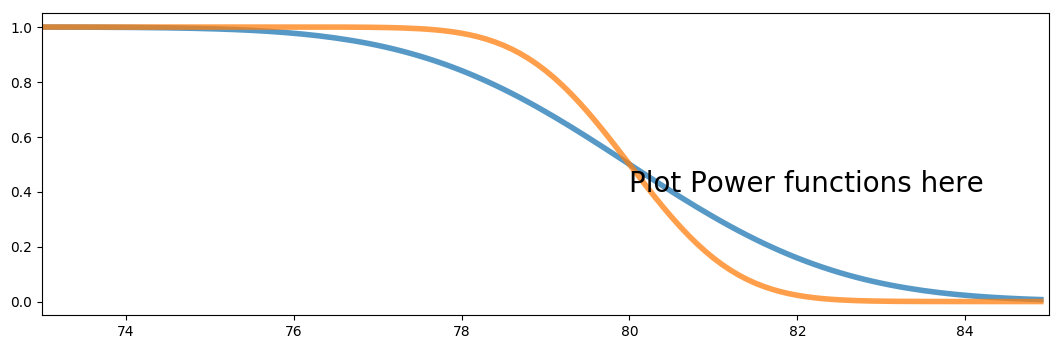

In [21]:
### plot difference power funcitons
import numpy as np
import scipy.stats

def power_function(n, sigma, alpha=0.05, low=70, high=85):
    mu = np.arange(low, high, 0.1)
    pw_fun = []
    for x in mu:
        res = scipy.stats.norm.cdf((80 - x)/(sigma/np.sqrt(n)))
        pw_fun.append(res)
    return mu,pw_fun


mu,pw1 = power_function(n=25, sigma=10)
mu,pw2 = power_function(n=100, sigma=10)


import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13,4))
plt.plot(mu, pw1, lw=4, alpha=0.75)
plt.plot(mu, pw2, lw=4, alpha=0.75)

plt.xlim(73, 85)
plt.text(x=80, y=0.4, s="Plot Power functions here", size=20)
plt.show()

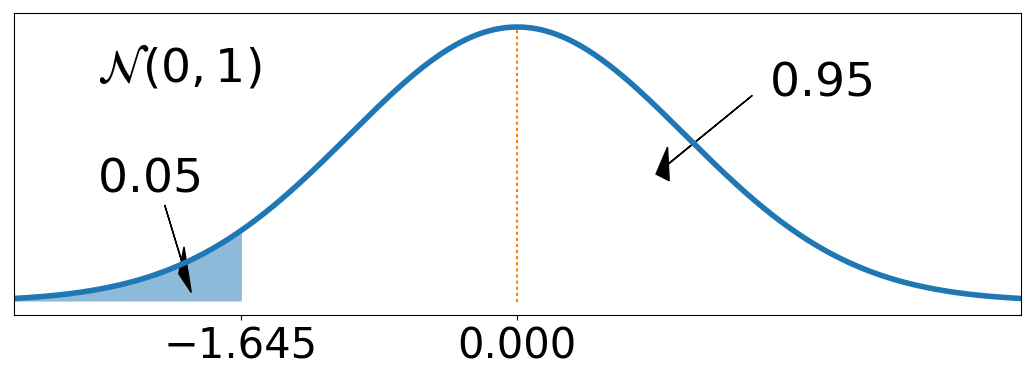

In [5]:
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x = np.arange(-4,4,0.01)
pdf = scipy.stats.norm.pdf(x)
inx1 = 0 
inx2 = np.where(x > -1.645)[0][0]
plt.figure(figsize=(13,4))
plt.fill_between(x[inx1:inx2+1], pdf[inx1:inx2+1], alpha=0.5)
plt.plot(x, pdf, lw=4)
plt.plot([0,0], [0,np.max(pdf)], ls='dotted')
plt.text(-2.5, 0.16, '$0.05$', size=34)
plt.arrow(-2.1, 0.14, 0.1, -0.08, head_width=0.05, fc='k')#, head_length=0.1, fc='k', ec='k')
plt.text(1.5, 0.3, '$0.95$', size=34)
plt.text(-2.5, 0.32, '$\mathcal{N}(0,1)$', size=34)
plt.arrow(1.4, 0.3, -0.5, -0.1, head_width=0.05, fc='k')#, head_length=0.1, fc='k', ec='k')
plt.xlim(-3, 3)
plt.xticks([-1.645, 0], size=30)
plt.yticks([])
plt.show()

 * **Higher power is better. why?**
 
$$\gamma(\mu) = \mathbf{P}_\mu [Reject] $$

Our objective is to reject $H_0$ as often as possible, that is why $\gamma(\mu)$ is better when it is big.

 * The whole argument above works for one sided $H_a$. What about if $H_a: \mu=80 ~\&~ H_a: \mu\ne 80$?
 
    * We would need to start the argument over again with a critial reject region of the form $C: \{|\bar{X} - 80| > \epsilon\} = \{\bar{X} < 80 - \epsilon\}\cup \{\bar{X} > 80 + \epsilon\}$.
 
 Then, follow same ideas as before...

 * What about if $c$ is given and I want to gather enough data?   
 
   Quesiotn is: how big should $n$ be to reject $\mu\ge 80$ based on critical region $C = \{\bar{X} \le 80 - \epsilon\}$ with a really small $\epsilon$?
   
   * If $\epsilon < 80 - 78.355$, then we will demand ore than $n=100$ data. Still use $\alpha = 0.05$.  
     Thus, we need $$80 - \epsilon \le -\frac{1.645}{\sqrt{n}}\sigma + 80 \Longrightarrow n \ge \left(\frac{1.645 \sigma}{\epsilon}\right)^2$$
     
     * with $\epsilon = 0.01, \sigma=10$, we get $n \ge (100\times 10\times 1.645)^2 = 1645^2 \approx 3 ~million$ 

 * What about picking $n$ to achieve a specific power?
 
  * The point is that we first allow cutoff $c$ to depend on $n$ 
    So here, we first solve for $c_n$ assuming $\alpha = 0.05$. We found $c_n = -\frac{1.645 \sigma}{\sqrt{n}} + 80$
    
    Now we investigate the power function:
     
     $$\gamma(\mu) = ... = \mathbf{P}\left[\mathcal{N}(0,1) < \frac{(c_n - \mu)\sqrt{n}}{\sigma}\right] \\ = \Phi\left(\frac{(c_n - \mu)\sqrt{n}}{\sigma}\right)$$
     
     Now, we ask the question: say we want a very high power for a fixed value of interest of $\mu$.  
     We want $\gamma(\mu) = 0.99$   
     Hiow much data do we need? Assume the vlaue of interest is $79.9$., thus find $n$ such that $\gamma(79.9) \ge 0.99$.
     
     $$\gamma(79.9) = \Phi(\frac{(c_n - 79.9)\sqrt{n}}{\sigma}) \ge 0.99$$ so we need $\ge z_{0.99} = 2.326$
     
     Then, plug in the previous formula for $c_n$ in thess
     
     $$\frac{-1.645 \sigma}{\sqrt{n}} + 80 - 79.9 \sqrt{n} \ge 2.326$$
     
     Solve for $\sqrt{n}$ ($\sigma$ known): $\sqrt{n} \ge 100(2.326 + 1,645 \sigma)$ and when $\sigma=10$. we get $n \ge \left(100(16.45 + 2.326)\right)^2$, results in $n$ more than $3$ millions.

Note: with this value of $n$, we must then compute $c_n = ... = 79.12$. Is that really right?

** Important Extension: ** If $n$ is nicely large, previous examples are an approximate general methodology even when the data is not normal.


____________________

____________________


##### Example: 3-decision for drug testing

 We have $n=20$ patients. We test a drug where probobaility of survival $p$ can change if drug is administered. Before the drug existed, we had $p=0.3$. Is the drug effective? ( that means for the drug to be effective, $p$ must be $>0.3$)
 
 Let $X=\# \text{of patients who survive}\sim Binomial(n=20, p)$ where $p$ is unknown. Obviously, we want $p > 0.3$.
 
 
 But there are really $3$ alternatives:
 
  * $H_0 : p=0.3$ : drug is ineffective  
  * $H_1 : p < 0.3$ : drug is harmful   
  * $H_2 : p > 0.3$ : drug is helpful
  
 We then define $H_a = H_1 \cup H_2 : p\ne 0.3$. Rejecting $H_0$ means drug has some effects, good or bad.
  
 We want a ***significance level*** in rejection around $0.1$.
  * $\mathbf{P}[x \ge 10] = 0.048$   
  * $\mathbf{P}[X \le 2] = 0.035$   
   
 Therefore, we can consider the rejection region: $C = \{X \ge 10\} \cup \{X \le 2\}$   
   
 See assuming $p=0.3$, $\mathbf{P}_{0.3}[C] = 0.048 + 0.035 = 0.083$
 
 So, we can say that at the significance level $\alpha=0.083$ we say that if $C$ is true, we reject $H_0$ versus $H_a$.
 
 * However, let's compute powers of events which point towards $H_1\&H_2$:   
   * Let $\gamma_1(p) = \mathbf{P}_p[X \le 2]$ power for bad: it should be small if $p>0.3$   
   * Let $\gamma_2(p) = \mathbf{P}_p[X \ge 2]$ : power for good : it should be small if $p<0.3$   
 

 Now, define $\gamma(p) = \gamma_1(p) + \gamma_2(p)$. This is exactly power function for a signal ???? of $H_0$ vs $H_a$
 Therefore, $\gamma(p)$ for good $p$'s ("significantly" larger than 0.3) should be close to $\gamma_2(p)$
 


So, if we observe a large $X$, we can use the original $\gamma(p)$ as almost $=\gamma_2(p)$ and say that this is the power of the test when the drug is good.

Similarly, when observe small $X$, $\gamma(p)$ is almost $\gamma_1(p)$. This approximation is usually excellent. 

It only slightly overestimates power of good test (or of bad test)

## <a name="neymar-pearson"></a>Neymar-Pearson Lemma

 * $H_0: ~\theta = \theta_0$   
 * $H_a: ~\theta = \theta_1$

two simple hypothesis.

**Lemma:** Data with density $f(x;\theta)$. 
Consider the likelihood ratio: $r(x) = \displaystyle \frac{f(x;\theta_1)}{f(x; \theta_0)}$

We want a rule to reject $H_0$, so $r(x)$ should be large (or at least $>1$).

 * Define a critical region $C^*$ of the form $C^* = \{r(x) \ge k\}$ and $k$ is a fixed constant.
 
 * Next, fix a given significance level for the test $H_0$ vs $H_a$ (in another words: $\theta = \theta_0$ vs. $\theta = \theta_1$)
 
 * Let $\gamma^*$ be the power function for the test under $C^*$
 
 * Then, $\gamma^*(\theta_1) \ge \gamma(\theta_1)$ where $\gamma = \text{power function for any other critical region }C$ at the same significance level.
 
  This means the test based on $C^*$ is better than any other test at same significance level.

  Here, $k$ is picked to adjust test based on $C^*$ to the desired significance level.

 * This means the tests based on $r(x)$ are always optimal for simple hypotheses at given significance level.

This result is true because:
  $$\gamma^*(\theta_1) - \gamma(\theta_1) \ge k\left(\gamma^*(\theta_0) - \gamma(\theta_0)\right)$$
  
  this $\gamma^*(\theta_0)$ is the significance level you want for your test based on $C^*$.
  
  By this, we mean:
   * pick $\alpha$ you want, adjust $k$ such that $\gamma^*(\theta_0) = \alpha$
   

The lemma says this:
  * The comparison is only fair if the power of the other test is no bigger than $\alpha$. This just means $\gamma(\theta_0) \le \alpha$   

##### Example:

$X\sim Binomial(n,p)$

 * $H_0: ~p=p_0$   
 * $H_a: ~p=p_1$   
 
Assume $p_1 > p_0$.

$$r(x) = \frac{\left(\begin{array}{c}n\\x\end{array}\right)~p_1^x (1-p_1)^{n-x}}{\left(\begin{array}{c}n\\x\end{array}\right)~p_0^x (1-p_0)^{n-x}} = \left(\frac{p_1 (1-p_1)}{p_0 (1-p_0)}\right)^x \left(\frac{1-p_1}{1-p_0}\right)^{n}$$

Since $p_1 > p_0$, we find that $r(x)$ is an increasing function. Therefore, if we define $C^* = \{r(x) \ge k\}$ there exists a value $k$ such that $C^* = \{X \ge k'\}$



Example: $n=20$, $p_0=0.2$, and $p_1 > 0.2$. We investigate 
 * $\mathbf{P}_{p_0}[X \ge 6] = 0.196$  
 * $\mathbf{P}_{p_0}[X \ge 7] = 0.087$  
 


This trial-and-error type calculation above shows that at the $\alpha=0.1$ significance level, the rejection set $\{X \ge 7\}$ is indeed of the form $C^* = \{r(x) \ge k\}$. The value of $k$ doesn;t matter. We see that $k' = 7$. And, Neyman-Pearson gurantees that the test of $H_0$ vs $H_1$ with $C^*=\{X \ge 7\}$ is of higher power.

## <a name="likelihood_ratio"></a> The Likelihood Ratio Test

Consider MLEs $\hat{\theta}_0 ~\& ~ \hat{\theta}$ for $\theta \in \Omega_0$ versus $\theta \in \Omega$ ($\Omega \text{: everything}$)


 * Define:
 $$\Lambda_n(X) = \frac{L(\hat{\theta}_0(x); x)}{L(\hat{\theta}(x); x)} ~~~ \text{ Likelihood Ratio Statistic}$$
 
 Can we use $\Lambda_n(X)$ to reject $H_0$?
 * $H_0 ~:~ \theta \in \Omega_0$

The answer is "yes" if $H_0$ is rejectable, it must mean that $L(\hat{\theta}_0(x); x) \ll L(\hat{\theta}(x); x)$ because $H_0$ is unlikely.

Previously, we saw that under good conditions, a CLT holds for the MLE:

$$\hat{\theta}_n \sim \mathcal{N}(0, \frac{1}{I(\theta)})$$

Now, consider $C_n := -2 \log \Lambda_n(X)$


Then, we have the following FACT:
 $$C_n \to \chi^2(k-r)$$
 
 where $k=\text{dimension of }\Omega$ (as a subset of $\mathbb{R}^k$) and $r=\text{dimension of }\Omega_0$ (as a subset of $\mathbb{R}^r$)

Basesd on this fact, we have the following rejection rule for $H_0$:
 * Reject $H_0$ if $C_n$ is big enough.
 
Rejection region at significance level $\alpha$:
 $$\left\{C_n \ge \chi^2_{k-r,1-\alpha}\right\}$$
 
where the subscript $1-\alpha$ is for percentile.

#### Example:

Let $X = \left(X_i\right)_{i=1}^n \sim ~iid~ \mathcal{N}(\mu, \sigma^2)$ 

Assume $\mu \& \sigma^2$ are unknown. 

$\theta = (\mu, \sigma^2)$, therefore, $k=2$. (2 scalar parameters)

(Actually, $\Omega = \mathbb{R}\times \mathbb{R}_+$)

 * Our null hypothesis is $H_0 ~:~ \mu = \mu_0$   
 
   Therefore, $r=1$ because $\Omega=\{\mu_0\}\times \mathbb{R}_+$ one dimensional space. 
 
 
 * Now, recall that $\hat{\theta}_0(X) = \left(\mu_0, \hat{\sigma}_0^2\right)$ where $\hat{\sigma}_0^2 = \text{sample variance assuming} \mu=\mu_0  \longrightarrow \hat{\sigma}_0^2 = \frac{1}{n}\sum_{i=1}^n (X_i - \mu_0)^2$ 

 * $\displaystyle \hat{\theta}(X) = \left(\text{sample mean}, \text{sample variance}\right) = \left(\bar{X}_n, \hat{\sigma}_n^2\right)$ where sample variance $\hat{\sigma}_n^2 = \frac{1}{n}\sum_{i=1}^n (X_i - \bar{X})^2$
 
 $$\Lambda_n(X) = \frac{L(\hat{\theta}_0(X), x)}{L(\hat{\theta}(X), x)} =  ... = $$
 
 Take the log for simiplicity:
 
 $$\log \Lambda_n(X) = \log \frac{L(\hat{\theta}_0(X), x)}{L(\hat{\theta}(X), x)} =  ... = \frac{n}{2}\log \left(\frac{\hat{\sigma}_0^2}{\hat{\sigma}^2} \right) \\ = \frac{n}{2}\log \left(\frac{\sum_{i=1}^n (X_i-\mu_0)^2}{\sum_{i=1}^n (X_i-\bar{X}_n)^2}\right) = ... = \frac{n}{2}\log \left(1 - \frac{(\bar{X}_n - \mu_0)^2}{\hat{\sigma}^2}\right)$$
 
Note: Under $H_0$, $\bar{X}_n \to \mu_0$. (how fast?) In fact, we know that a CLT holds. So, the speed of convergence is $1/\sqrt{n}$. In other words: $\bar{X}_n - \mu_0 $ is of order $\frac{1}{\sqrt{n}}$, so $\bar{X}_n - \mu_0$ is small. Even better, $Z_n = \frac{\bar{X}_n - \mu_0}{\sigma} \sqrt{n} \to \mathcal{N}(0,1)$

Recall: if $u$ is small: $\ln (1+u) \approx u$

Therefore, $$-2\log \Lambda_n(X) \approx -n \left(\frac{(\bar{X}_n - \mu_0)^2}{\hat{\sigma}^2_n}\right) = n \left(\frac{\bar{X}_n - \mu_0}{\hat{\sigma}_n}\right)^2$$ 

which is according to Slutsky, $\approx Z_n^2$ 

 and since $Z_n \sim \mathcal{N}(0,1)$, then $Z_n^2 \sim \chi^2{(1)}$ because the square of a normal distribution is a $\chi^2$ with 1 degrees of freedom.
 
 * We can reject $H_0$ under the following rule:
 
 $$\left\{C_n \ge \chi^2_{df=1,1-\alpha}\right\} \text{ for any }\alpha\text{ we want}$$

Note: this entire argument also works even if the data $X$ is not normal, as long as the CLT for $Z_n$ works well.

Note: if we were working with an example where $k-r\ge 2$, we would end up with an approximation for $-2\log \Lambda_n(X)$ where a sum of squares of independent normals appears; i.e. instead of $Z_n$ in the final approximation, we would see $\displaystyle \sum_{l=1}^{k-r} \left(Z_{n,l}\right)^2$ where each random variable $Z_n$ is normal and $Z_{n,l} \& Z_{n,l'}$ are independent for $l\ne l'$ 
This explains the appearance of $\displaystyle \chi^2_{df=k-1} \sim \sum_{l=1}^{k-r} (Z_{n,l})^2$

Back to the example: when $k-r=1$, we can say things differently.

 * $C_n \approx Z_n^2$ means we can transform the rejection region as follows:

 $$\text{Reject }H_0\text{ if and only if } \left\{ Z_n^2 > \text{some value}\right\} \\ \text{or the same as } \left\{ |Z_n| > c\right\} \\ \left\{Z_n > c \text{ or } Z_n < -c\right\}$$
 
Want to choose $c$ so that $\displaystyle \mathbf{P}[\left\{Z_n > c \text{ or } Z_n < -c\right\}] \le \alpha $

$$\Longrightarrow \mathbf{P}[Z_n > c] + \mathbf{P}[Z_n < -c] = 2\left(1 - \Phi(c)\right) = \alpha$$

## <a name="p-values"></a> p-values 

**p-values do not ask whether $H_0$ can be rejected, but say how unlikely or likely it is vs $H_a$**

### Definition: 

Let $T(X)$ be a scalar statistic, let $\alpha$ be a significance level.

Assume $T(X) \ge T(\alpha)$ is a critical rejection region for $H_0$. I.e. assuming the $H_0$ model holds,$\mathbf{P}_{H_0}[T(X) \ge t_\alpha] = \alpha$ 

(assume $H_0$ is sumple: $\theta=\theta_0$)

But we can define $\hat{\alpha} = \mathbf{P}_{\theta_0}[T(X) \ge T(x)]$ (note: $x$ is observed data values, we can call it *empirical value of the statistic*)

 * Here we see that $T(X)$ is the probabilistic model for the statistic
 
 * and $T(x)$ is the observed (sample) value of the same statistic
 
 Therefore, $\hat{\alpha}$ is really a sample or observed rejection significance level. It is known as the **p-value** or better yet, the ***observed p-value***.

Anyone wanting to reject $H_0$ at a significance level greater than p-vlaue $\hat{\alpha}$, can do so based on data $x$.


##### Example:

Let $X_i: i=1,...,25$ be $iid~\mathcal{N}(\mu, \sigma^2)$.

 * $H_0 ~:~ \mu = 50$  
 
 * $H_a ~:~ \mu < 50$ (one sided test)
 
 Rejection rule: use $T(X)=\frac{\bar{X} - 50}{\sqrt{s^2/n}}$. It is known that $T(X)$ has a **Student t-distribution** with degree of freedom $df=25-1=24$. 
 
  If $t_{24,\alpha}$ is the $\alpha^{th}$ percentile for that distribution, then rejection rule is $\left\{T(X) \le t_{24,\alpha}\right\}$
  
Now, assume $x=(x_1,x_2,..., x_{25})$ is our observation. Assume that $\mu=50$ and compute 

$$\hat{\alpha} = \mathbf{P}[T(X) \le T(x)] = \mathbf{P}[t_{24} \le T(x)]$$

We have proved that the p-value for our hypothesis $H_0:~\mu=50$ vs $H_a:~\mu < 50$ is the value of CDF of $t_{24}$ distribution evaluated at $T(x)$

 * $\displaystyle T(x) = \frac{\displaystyle \frac{1}{25} \sum_{i=1}^{25} x_i  - 50}{\displaystyle \frac{1}{5} \sqrt{\frac{1}{24} \sum_{i=1}^{25} \left(x_i  - \sum_{i=1}^{25}x_i\right)^2}}$
 
 * Summary conclusion: we can reject $H_0$ vs $H_a$ at observed significance level $\hat{\alpha}$ based on data $x$.

#### Example: (2-sided case)

In previous example: $H_0~:~\mu=50$ and $H_a~:~\mu\ne 50$

Observe $t_{24}$ statistic $T(x)$. 

Rejection rule: $|\bar{X} - 50|$ should be large.

therefore, $|T(x)| \ge t_{\alpha/2}$ (**two-sided**)

Thus: $$\hat{\alpha} = \mathbf{P}[|T(X)| > |T(x)|] = 2\mathbf{P}[T(X) > |T(x)|] = 2\mathbf{P}[T(X) <  -|T(x)|]$$



## <a name="confidence_interval"></a> Confidence Interval & Hypothesis Testing

Assume $\gamma = \text{confidence interval} I(X)=\text{confidence interval }\gamma\%$

Thus, $\forall \theta: ~\mathbf{P}_\theta[\theta \in I(X)] = \gamma$

 * Test $H_0:~ \theta = \theta_0$ vs $H_a:~\theta\ne \theta_0$
 
Assume we find a rejection rule of the form $\theta \notin I(X)$ (hypothesis test against $H_0$ at significance level $1-\gamma$)

Thus: $\mathbf{P}_{\theta_0}[\theta_0 \in I(X)] \le 1-\gamma$

More specific comparison: assume the confidence interval is one-sided. For example, of the form $I(X) = \left[L(X); +\infty\right)$

 * $H_0~:~\theta > \theta_0 ~~~~\&~~~~ H_a~:~\theta\le \theta_0$  
 
Here, we find $L(X)$ by asking:

$$\forall \theta:~ \mathbf{P}_{\theta} [L(X) \le \theta] \ge \gamma$$

Then, reject $H_0$ using test $L(X)>\theta_0$ at significance level $\mathbf{P}_{\theta_0}[L(X) > \theta_0] \le 1-\gamma$

#### Example:

 * Data $x$: $n=25~iid \mathcal{N}(\mu, \sigma^2)$ 
 
 * $H_0~:~\mu\ge 50  ~~~~\&~~~~ H_a <50$ 
 
 We want to find $U(X)$ such that $\mathbf{P}_\theta[\bar{X} \le U(X)] \ge \gamma$
 
We use the fact that $T(X)$ is a t-statistic distribution with $df=24$.
 
 Therefore, just rewrite $\mathbf{P}_\theta[\bar{X} \le U(X)] \ge \gamma $:
 
 $$\mathbf{P}_\theta[\frac{\bar{X}_n -\mu}{\sqrt{S/25}} \ge t_{24,\gamma}]=\gamma$$
 
 here $\theta=(\mu, \sigma^2)$

Important point is that the $-t_{24,\gamma}$ only depends on $\gamma$, not on $\theta=(\mu, \sigma^2)$

Convert the probability into an interval where $\mu$ belongs:

$$\mathbf{P}\left[\mu \le t_{24,\gamma}\sqrt{\frac{S^2}{25}} + \bar{X}\right]$$

This is true for all $\theta=(\mu, \sigma^2)$. Therefore, we may take $U(X) = \text{upper bound on confidence interval for }\mu = \bar{X} + t_{24,\gamma}\sqrt{\frac{S^2}{25}}$

Conclusion of thie example:

The test $\left\{U(X) < 50\right\}$ reject $H_0$ at $\alpha=1-\gamma$ significance level.


* Numerical application for thie example:

  * $\gamma=0.95$, $\alpha=0.05$ 
  
  $t_{24,0.95} = 1.711$

  Assume $\bar{X}=47.3 ~~\&~~ S^2=6.63^2$
  
  Then, $U(X) = 47.3 + 1.711\times \sqrt{\frac{6.63^2}{25}} = 49.57$  
  
  so we reject $H_0~:~\mu > 50$

-------------------

------------------


### <a name="head_application"></a> Machine Learning Applcication: Model Evaluaiton

**Problem statement: ** For model evaluaiton in mahcine learning, let's assume we have two models $M_1$ and $M_2$. And we want to see which model performs better, or whther they are statistically similar. We have prediction results (observations) from a testset of size $1000$ data point, and the rate of correct/incorrect results are as follows

 * $M_1$ gives $950$ correct and $50$ incorrect    
 * $M_2$ gives $970$ correct and $30$ incorrect    



              -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  

**Solution: **

Consider two ***independent*** random variable $X$ and $Y$ as follows

 * $X \sim Binomial(n=1000, p_1)$   
 * $Y \sim Binomial(n=1000; p_2)$   


  Note: In order to make $X~\&~Y$ independent, we should make sure that the testest are disjoint, therefore, we assume that the testset has $2000$ data points, and $M_1$ and $M_2$ each take $1000$ data points without sharing any data point.

We observe that $X=950,~ Y=970$   

**Hypothesis Test:**    
 * $H_0: ~ p_1 = p_2$  (i.e. the two models have similar performance)  
 * $H_a: ~ p_1 < p_2$  (model $M_2$ performs better than $M_1$)   
 
Let's try to compute a p-value:

Note: $X$ is a sufficent statistic for $p_1$ and $Y$ is a sufficient statistic for $p_2$.

Now, assume that the null hypothesis is true, and see how unlinkely the observation is:
   
   $$\mathbf{P}_{H_0} \left[Y - X \ge 20\right]$$
   
 In order to find the probability above, we need to find $Y-X$. $Y$ and $X$ are independent, and therefore we can say $Y\&X$ are approximately normal because $n$ is large and $np$ is not close to $1$.
 
 Therefore, $X,Y \sim \mathcal{N}(n\pi, n\pi(1-\pi))$ where $\pi=p_1=p_2$.
 
 * A property of normal random varibale: Adding two normal random variables is still normal
 
 $W = Y - X \Longrightarrow \left\{\begin{array}{c}\mathbf{E}[W] = 0 \\ \mathbf{Var}[W] = 2n\pi(1-\pi)\end{array}\right.  \Longrightarrow W \sim \mathcal{N}(0, n\pi(1-\pi))$
 
Now, we can rewrite our probability by standardizing $W$:

We want $\mathbf{P}_{H_0} [W \ge 20] $:

$$\mathbf{P}_{H_0} \left[W \ge 20\right] = \mathbf{P}_{H_0}\left[\mathcal{N}(0, n\pi(1-\pi)) \ge 20\right] \\ = \mathbf{P}\left[Z \ge \frac{20 -0}{\sqrt{n\pi(1-\pi)}}\right] = 1  - \Phi(\frac{20}{\sqrt{2n\pi(1-\pi)}}) \\ = 1 - \Phi(\frac{10\sqrt{2}}{10 \sqrt{10}\sqrt{n\pi(1-\pi)}})$$


We need to find an upper bound for the above. $\pi(1-\pi)$ is maximum at $\pi=1/2$ and the maximum vlaue is $1/4$.

 *Note: $\Phi$ is always increasing, $-\Phi$ is always decreasing. So, when the minimize the input argument, $1-\Phi$ becomes maximum (the upper bound)*


We get p-value: $1-\Phi(..) = 0.19$; *based on this we cannot reject the null hypothesis.*


In [4]:
import numpy as np
import scipy.stats

p = 0.5
x = np.sqrt(2)*10/(np.sqrt(1000)*np.sqrt(p*(1-p)))
print('p-value   ==>    1-Phi({:.3f}) = {:.3f}'.format(x, 1-scipy.stats.norm.cdf(x)))

p-value   ==>    1-Phi(0.894) = 0.186


The above p-value was computed using $\pi=0.5$ (which is the worst case).

Instead, we we happend to know that $p\ge 0.9$. Then, the upper bound on $\pi(1-\pi)$ would be $0.9\times(1-0.9)=0.09$.


p-value: $1-\Phi(..) = 0.068$

In [3]:
p = 0.9
x = np.sqrt(2)*10/(np.sqrt(1000)*np.sqrt(p*(1-p)))

print('p-value   ==>    1-Phi({:.3f}) = {:.3f}'.format(x, 1-scipy.stats.norm.cdf(x)))

p-value   ==>    1-Phi(1.491) = 0.068
